<a href="https://colab.research.google.com/github/BorisMejiasII/RegresionLineal-II/blob/main/S07-Linear-Models/Tarea_regresion_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Regresion Lineal aplicada a datos de automóviles

En esta tarea usted debe investigar acerca del conjunto de datos [auto mpg](https://seaborn.pydata.org/examples/scatter_bubbles.html) perteneciente a la libreria [seaborn](https://seaborn.pydata.org/)

**Objetivo**: Estimar el rendimiento promedio de automoviles usando regresión lineal

1) (1 punto) Establecer una visualización de los datos a través de un [Gráfico de dispersión](https://seaborn.pydata.org/tutorial/axis_grids.html)

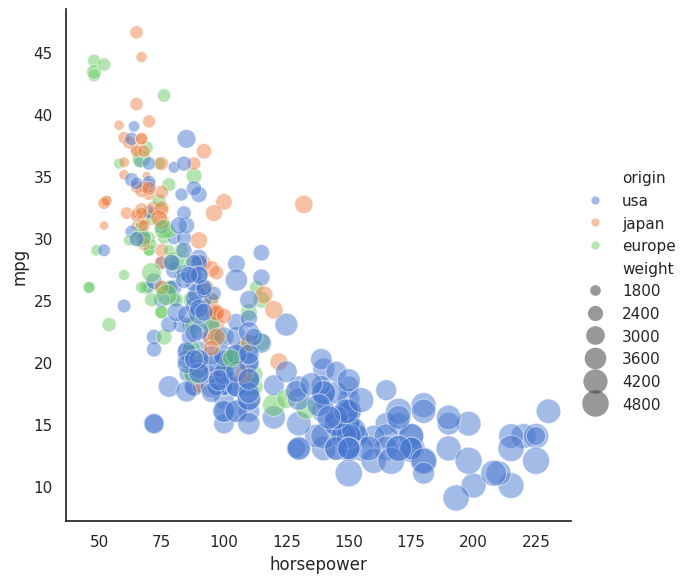

In [1]:
import seaborn as sns
sns.set_theme(style="white")

# Load the example mpg dataset
mpg = sns.load_dataset("mpg")

# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="horsepower", y="mpg", hue="origin", size="weight",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=mpg)

2) (1 punto) Investigar e incluir un grafico de correlacion ([Correlation Plot](https://seaborn.pydata.org/examples/many_pairwise_correlations.html)) para visualizar la dependencia entre los datos

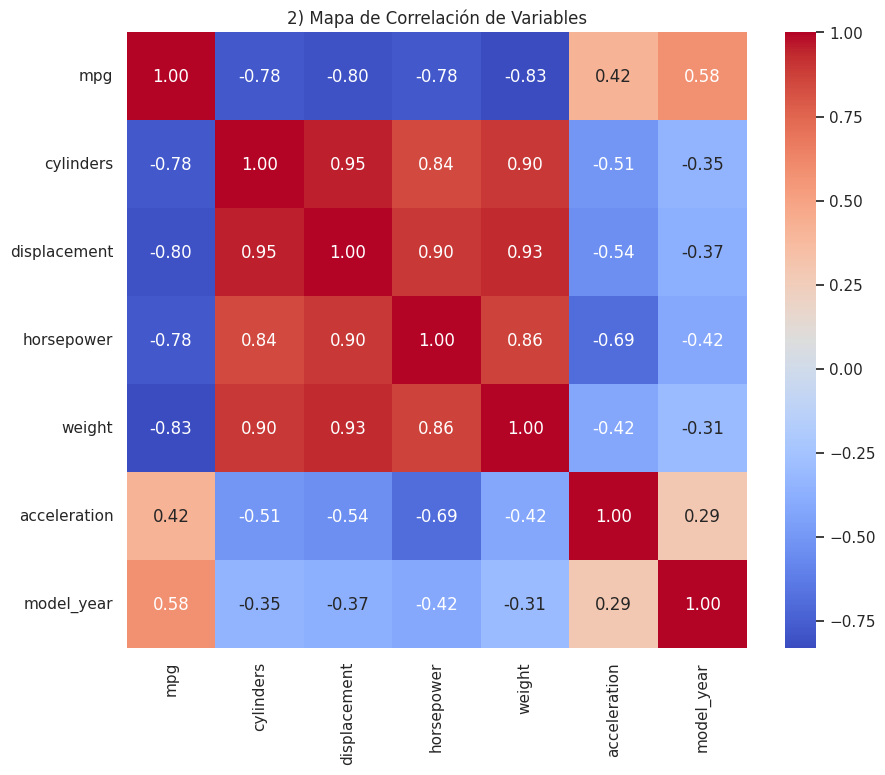

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular matriz de correlaciones numéricas
corr = mpg.corr(numeric_only=True)

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("2) Mapa de Correlación de Variables")
plt.show()


3) (1 punto) Construir y entrenar un modelo de regresion lineal


In [4]:

# 0) Cargar y limpiar datos — ¡MUY IMPORTANTE antes de todo!
mpg = sns.load_dataset("mpg").dropna(subset=["horsepower", "mpg"])

# 3) Construcción y entrenamiento del modelo de regresión lineal
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Selección de variables (ahora sin NaNs)
X = mpg[["horsepower"]]
y = mpg["mpg"]

# División de datos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Entrenar modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

print("3) Modelo entrenado:")
print(f"   Coeficiente: {modelo.coef_[0]:.4f}")
print(f"   Intercepto: {modelo.intercept_:.4f}")


3) Modelo entrenado:
   Coeficiente: -0.1626
   Intercepto: 40.6061


4) (1 punto) Mostrar estadistiscas de desempeño del modelo (investigar)

In [7]:
 from sklearn.metrics import mean_squared_error, r2_score

# Predicción
y_pred = modelo.predict(X_test)

# Métricas
mse = mean_squared_error(y_test, y_pred)
r2  = r2_score(y_test, y_pred)

print("4) Desempeño del modelo:")
print(f"   Error Cuadrático Medio (MSE): {mse:.2f}")
print(f"   Coeficiente de Determinación (R²): {r2:.2f}")


4) Desempeño del modelo:
   Error Cuadrático Medio (MSE): 22.15
   Coeficiente de Determinación (R²): 0.57


5) (1 punto) Mostrar [graficamente la lineas rectas](https://seaborn.pydata.org/tutorial/regression.html) en un grafico de dispersión para el par de variables que presentan la mayor correlacion. esta informacion la obtiene del correlation plot. realizar un grafico de dispersion con las variables mas correlacionadas.


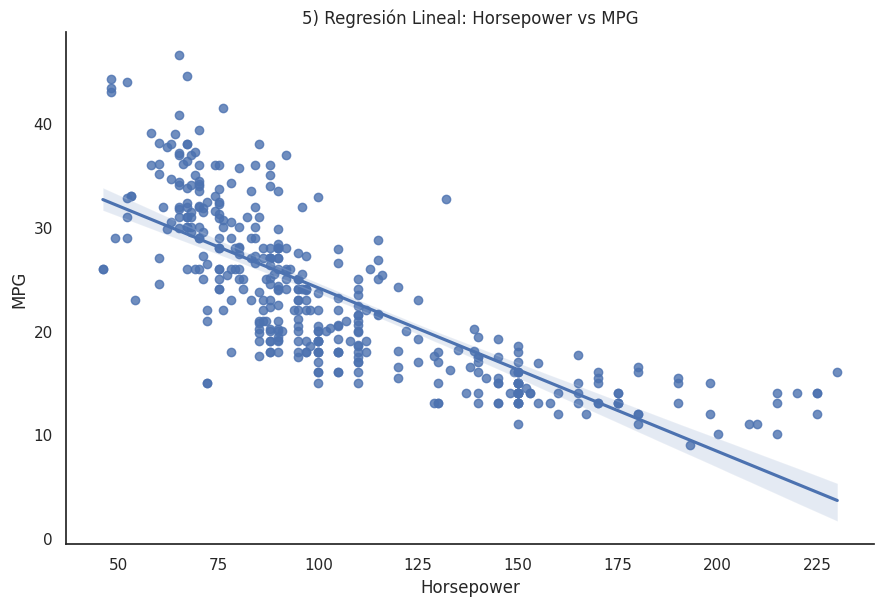

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# lmplot para la relación más correlacionada (horsepower vs mpg)
sns.lmplot(x="horsepower", y="mpg", data=mpg, aspect=1.5, height=6)
plt.title("5) Regresión Lineal: Horsepower vs MPG")
plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.show()


6) (1 punto) [Guardar el Jupyter notebook resultante en su cuenta propia de Github ](https://bebi103a.github.io/lessons/02/git_with_colab.html) y compartir el enlace en la pagina de la tarea en Educandus.